# 作業目標:

    通過建立多層的神經網路, 了解權值矩陣更新

# 作業重點: 

3  層神經網路

通過增加更多的中間層，以對更多關係的組合進行建模

syn1 權值矩陣將隱層的組合輸出映射到最終結果，

而在更新 syn1 的同時，還需要更新 syn0 權值矩陣，

以從輸入資料中更好地產生這些組合

In [1]:
import numpy as np

def nonlin(x,deriv=False):
    if(deriv==True):
        return x*(1-x)
    return 1/(1+np.exp(-x))

X = np.array([  [0,0,1],
                [0,1,1],
                [1,0,1],
                [1,1,1] ])  
        
y = np.array([[0],
            [1],
            [1],
            [0]])
 


In [2]:
np.random.seed(1)
 
# syn0 第一層權值
# syn1 第二層權值

syn0 = 2*np.random.random((3,4)) - 1
syn1 = 2*np.random.random((4,1)) - 1

syn0_history = [syn0]
syn1_history = [syn1]
 
      



神經網路訓練
for 迴圈反覆運算式地多次執行訓練代碼，使得我們的網路能更好地擬合訓練集

In [7]:
for j in range(10000):
    
    l0 = X
    l1 = nonlin(np.dot(l0,syn0))
    l2 = nonlin(np.dot(l1,syn1))  
    l2_error = y - l2
 
    if (j% 10000) == 0:
        print("L2_Error:" + str(np.mean(np.abs(l2_error))))

    l2_delta = l2_error*nonlin(l2,deriv=True)

    l1_error = l2_delta.dot(syn1.T)
    
    if (j% 10000) == 0:
        print("L1_Error:" + str(np.mean(np.abs(l2_error))))

    l1_delta = l1_error * nonlin(l1,deriv=True)
 
    syn1 += l1.T.dot(l2_delta)
    syn0 += l0.T.dot(l1_delta)
    
    syn1_history.append(syn1)
    syn0_history.append(syn0)     
print("\n\n")
print("Output After Training: l1")
print(l1)
print("\n\n")
print("Output After Training: l2")
print(l2)

L2_Error:0.005789459862507806
L1_Error:0.005789459862507806



Output After Training: l1
[[6.95575162e-01 1.23557729e-01 9.23295488e-01 9.96399594e-01]
 [1.80042870e-01 4.68602366e-04 1.72600014e-02 8.92539916e-01]
 [9.94691790e-01 8.87830602e-01 2.32799129e-02 8.22206919e-01]
 [9.47390083e-01 2.56468223e-02 3.47759112e-05 1.21876577e-01]]



Output After Training: l2
[[0.00378344]
 [0.99519922]
 [0.99570192]
 [0.00563475]]


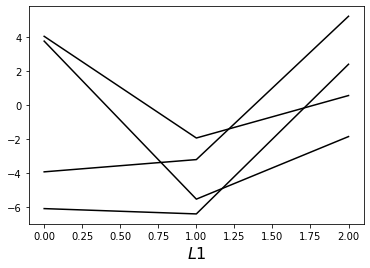

In [4]:
import matplotlib.pyplot as plt
%matplotlib inline 
#適用於 Jupyter Notebook, 宣告直接在cell 內印出執行結果

plt.plot(syn0_history[0], ms=3, lw=1.5, color='black')
plt.xlabel(r'$L1$', fontsize=16)
plt.show()

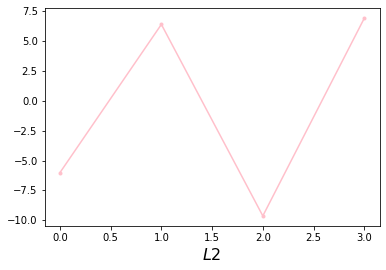

In [5]:
plt.plot(syn1_history[0], 'o-', ms=3, lw=1.5, color='pink')
plt.xlabel(r'$L2$', fontsize=16)
plt.show()